In [1]:
#Data handling
import h5py
#Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns


#Mathematical libraries
import numpy as np
import scipy.stats as stats, sparse
import bottleneck
import statsmodels.api as sm
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from scipy.sparse import csr_matrix
from scipy import sparse
import pickle

In [30]:
def parse_pdist(filename):
    """
    Loads data in file to dataframe.
    """
    col_uid = []
    row_uid = []
    with h5py.File(filename, 'r') as f:

        jac_structure = f['jac_structure'][:]
        jac_go = f['jac_go'][:]
        exp_condensed = f['exp_condensed'][:]
        col_1 = [ s.decode() for s in  f['col_1'][:] ]
        col_2 = [ s.decode() for s in  f['col_2'][:] ]
        df = pd.DataFrame(list(zip(col_1, col_2, jac_structure, jac_go, exp_condensed)), columns =['col_1', 'col_2', 'jac_structure', 'jac_go', 'exp_condensed'])
    return df 

In [380]:
data = pd.read_csv('cath-b-newest-all.txt', sep=" ", header=None)
data.columns = ["pdb_chain_domain", "version", "cath", "residues"]

In [70]:
df = pd.read_hdf('/data/lohia/EGAD_analysis/3d_pred/gene3dout.hdf5', 'nw') #this was the file written from api
df = pd.concat([df.drop(['metadata'], axis=1), df['metadata'].apply(pd.Series)], axis=1)
df = pd.concat([df.drop(['evidences'], axis=1), df['evidences'].apply(pd.Series)], axis=1)
df = pd.concat([df.drop(['source'], axis=1), df['source'].apply(pd.Series)], axis=1)
df = df.loc[df['type'] == 'PREDICTED_DOMAIN']

In [74]:
df_cath_prediction = df[df['resource'].isin(['pDomTHREADER'])]
df_cath_prediction['loc_length'] = [i[0]['fragments'][0]['end'] - i[0]['fragments'][0]['start'] + 1 for i in df_cath_prediction['locations']]
#df_cath_prediction = df[df['resource'].isin(['FUGUE (CATH-based)', 'Gene3D', 'pDomTHREADER'])]
del df_cath_prediction['length']
del df_cath_prediction['tooltipContent']
del df_cath_prediction['anno_id']
del df_cath_prediction['type']
del df_cath_prediction['code']
del df_cath_prediction['name']
del df_cath_prediction['url']

/home/lohia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


accession                                      locations confidence  \
25    P00519   [{'fragments': [{'end': 121, 'start': 64}]}]        100   
26    P00519  [{'fragments': [{'end': 224, 'start': 127}]}]        100   
27    P00519  [{'fragments': [{'end': 317, 'start': 225}]}]        100   
28    P00519  [{'fragments': [{'end': 491, 'start': 318}]}]        100   
29    P00519  [{'fragments': [{'end': 995, 'start': 569}]}]        100   
..       ...                                            ...        ...   
0     Q9BTK6   [{'fragments': [{'end': 254, 'start': 40}]}]         90   
3     A6NCN8  [{'fragments': [{'end': 264, 'start': 136}]}]         90   
1     Q2M3D2    [{'fragments': [{'end': 350, 'start': 1}]}]         99   
2     Q2M3D2  [{'fragments': [{'end': 395, 'start': 373}]}]         90   
3     Q2M3D2  [{'fragments': [{'end': 409, 'start': 399}]}]         90   

        resource       id  loc_length  
25  pDomTHREADER  2ablA01          58  
26  pDomTHREADER  1opkA02          98  
27  pDomTHREADER  1opjA01          93  
28  pDomTHREADER  2hziA02         174  
29  pDomTHREADER  1s58A00         427  
..           ...      ...         ...  
0   pDomTHREADER  1up8A00         215  
3   pDomTHREADER  1jvrA00         129  
1   pDomTHREADER  1qgrA00         350  
2   pDomTHREADER  1o7dE00          23  
3   pDomTHREADER  1lcyA01          11  

[21840 rows x 6 columns]

In [89]:
df_cath_prediction['confidence'] = df_cath_prediction['confidence'].astype('int')
df_cath_prediction = df_cath_prediction[(df_cath_prediction['confidence'] > 95) & (df_cath_prediction['loc_length'] > 80)]

/home/lohia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
merged_left = pd.merge(left=df_cath_prediction, right=data, how='left', left_on='id', right_on='pdb_chain_domain')
merged_left

accession                                        locations  confidence  \
0        P00519    [{'fragments': [{'end': 224, 'start': 127}]}]         100   
1        P00519    [{'fragments': [{'end': 317, 'start': 225}]}]         100   
2        P00519    [{'fragments': [{'end': 491, 'start': 318}]}]         100   
3        P00519    [{'fragments': [{'end': 995, 'start': 569}]}]         100   
4        P00519  [{'fragments': [{'end': 1130, 'start': 1024}]}]         100   
...         ...                                              ...         ...   
11112    P29966      [{'fragments': [{'end': 332, 'start': 1}]}]          99   
11113    Q7Z443     [{'fragments': [{'end': 141, 'start': 25}]}]         100   
11114    Q7Z443    [{'fragments': [{'end': 851, 'start': 738}]}]         100   
11115    P32745     [{'fragments': [{'end': 330, 'start': 18}]}]         100   
11116    Q2M3D2      [{'fragments': [{'end': 350, 'start': 1}]}]          99   

           resource       id  loc_length pdb_chain_domain version  \
0      pDomTHREADER  1opkA02          98          1opkA02  v4_2_0   
1      pDomTHREADER  1opjA01          93          1opjA01  v4_2_0   
2      pDomTHREADER  2hziA02         174          2hziA02  v4_2_0   
3      pDomTHREADER  1s58A00         427          1s58A00  v4_2_0   
4      pDomTHREADER  1zzpA00         107          1zzpA00  v4_2_0   
...             ...      ...         ...              ...     ...   
11112  pDomTHREADER  1s58A00         332          1s58A00  v4_2_0   
11113  pDomTHREADER  1eggA00         117          1eggA00  v4_2_0   
11114  pDomTHREADER  1ca1A02         114          1ca1A02  v4_2_0   
11115  pDomTHREADER  1hzxB00         313          1hzxB00  v4_2_0   
11116  pDomTHREADER  1qgrA00         350          1qgrA00  v4_2_0   

               cath   residues  
0       3.30.505.10  146-247:A  
1       3.30.200.20  243-336:A  
2       1.10.510.10  318-500:A  
3       2.170.30.10   19-554:A  
4      1.20.120.330   31-139:A  
...             ...        ...  
11112   2.170.30.10   19-554:A  
11113   3.10.100.10  628-763:A  
11114    2.60.60.20  251-370:A  
11115  1.20.1070.10    1-326:B  
11116    1.25.10.10    1-876:A  

[11117 rows x 10 columns]

In [91]:
merged_left.dropna(inplace=True)

In [94]:
merged_left['accession']

0        P00519
1        P00519
2        P00519
3        P00519
4        P00519
          ...  
11112    P29966
11113    Q7Z443
11114    Q7Z443
11115    P32745
11116    Q2M3D2
Name: accession, Length: 11109, dtype: object

In [102]:
idx = merged_left.groupby(['accession'])['loc_length'].transform(max) == merged_left['loc_length']
merged_left = merged_left[idx]

In [258]:
merged_left['pdb'] = merged_left['pdb_chain_domain'].str[:4] # removing extra characters in protein name
merged_left['chain'] = merged_left['pdb_chain_domain'].str[4:5]
merged_left['pdb_chain'] = merged_left['pdb'] + '_' + merged_left['chain']

/home/lohia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/lohia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/lohia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [147]:
import itertools
domain_id = set(merged_left['pdb'].tolist())
index_list = list(itertools.combinations(domain_id,2))
id_1 = [i[0] for i in index_list]
id_2 = [i[1] for i in index_list]

In [236]:
import pickle
with open('domain_id.txt', 'wb') as fp:
    pickle.dump(list(set(merged_left['pdb_chain_domain'].tolist())), fp)

In [162]:
import subprocess
for id_1 in list(domain_id):
    subprocess.call("wget https://files.rcsb.org/download/%s.pdb" %id_1, shell=True)
    #! wget https://files.rcsb.org/download/id_2.pdb

In [168]:
merged_left['freq'] = 1
merged_right = merged_left.head(10000000)
new=merged_right['cath'].str.split(".", n = 3, expand = True)  # expand the cath domains
merged_right['cat'] = new[0] + '.' + new[1] + '.' + new[2]
table = pd.pivot_table(merged_right, index=['pdb'],
                    columns=['accession'], values= 'freq')
structure_cat = table.T
structure_cat = structure_cat.fillna(0)

/home/lohia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/lohia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [169]:
structure_cat

pdb        1914  1a17  1a1w  1a3q  1a4i  1a4p  1a4s  1a6j  1a76  1a8d  ...  \
accession                                                              ...   
A0AV96      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
A0AVF1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
A0AVI2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
A0AVK6      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
A0FGR8      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
Q9Y6X9      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Q9Y6Y0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Q9Y6Y1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Q9Y6Y8      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Q9Y6Y9      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

pdb        3g25  3grs  3kvt  3pmg  3pnp  3psg  4dpv  4mt2  4tmk  6ldh  
accession                                                              
A0AV96      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
A0AVF1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
A0AVI2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
A0AVK6      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
A0FGR8      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
Q9Y6X9      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
Q9Y6Y0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
Q9Y6Y1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
Q9Y6Y8      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
Q9Y6Y9      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[6005 rows x 1574 columns]

In [259]:
uni_pdb = dict(zip(merged_left.accession,merged_left.pdb))

uni_pdbdomain = dict(zip(merged_left.accession,merged_left.pdb_chain_domain))

uni_pdb_chain =  dict(zip(merged_left.accession,merged_left.pdb_chain))

In [391]:
new=merged_left['cath'].str.split(".", n = 3, expand = True)  # expand the cath domains
merged_left['cat'] = new[0] + '.' + new[1] + '.' + new[2]
merged_left_uniq_domain = merged_left.drop_duplicates(subset=['pdb_chain_domain'])

domain_cath =  dict(zip(merged_left_uniq_domain.pdb_chain_domain,merged_left_uniq_domain.cat))

#domain_uniq= set(merged_left['pdb_chain_domain'].tolist())
#index_list = list(itertools.combinations(domain_uniq,2))

In [448]:
uni_id = list(set(list(exp.index.values)))
domain_uniq= [uni_pdbdomain[y] for y in uni_id]
index_list = list(itertools.combinations(domain_uniq,2))

In [451]:
#this is done to preserve the order of the list
def f7(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]
index_list = f7(index_list)

In [463]:
domain_pair_tm_score = [subprocess.check_output("/data/lohia/TMalign /data/lohia/EGAD_analysis/pdb_files/pdb_files/%s.pdb /data/lohia/EGAD_analysis/pdb_files/pdb_files/%s.pdb -a | grep 'TM-score=' | awk 'FNR == 3 {print $2}'" %(dom[0], dom[1]), shell=True).strip().decode('ascii') for dom in index_list[0:10000]]

In [464]:
new_items = [-1.0 if x=='' else float(x) for x in domain_pair_tm_score]

id1 = [dom[0] for dom in index_list[0:10000]]
id2 = [dom[1] for dom in index_list[0:10000]]
df_domain_pair_tm_score = pd.DataFrame({"id1": id1, "id2": id2, "tmscore": new_items })

df_domain_pair_tm_score['id1_cat'] = [domain_cath[i] for i in df_domain_pair_tm_score['id1']]
df_domain_pair_tm_score['id2_cat'] = [domain_cath[i] for i in df_domain_pair_tm_score['id2']]

id2 = [dom[0] for dom in index_list[0:10000]]
id1 = [dom[1] for dom in index_list[0:10000]]
df_domain_pair_tm_score_rev = pd.DataFrame({"id1": id1, "id2": id2, "tmscore": new_items })
df_domain_pair_tm_score_rev['id1_cat'] = [domain_cath[i] for i in df_domain_pair_tm_score_rev['id1']]
df_domain_pair_tm_score_rev['id2_cat'] = [domain_cath[i] for i in df_domain_pair_tm_score_rev['id2']]

df_domain_pair_tm_score_identity = pd.DataFrame({"id1": list(domain_uniq), "id2": list(domain_uniq), "tmscore": 1 })
df_domain_pair_tm_score_identity['id1_cat'] = [domain_cath[i] for i in df_domain_pair_tm_score_identity['id1']]
df_domain_pair_tm_score_identity['id2_cat'] = [domain_cath[i] for i in df_domain_pair_tm_score_identity['id2']]

df_domain_pair = pd.concat([df_domain_pair_tm_score, df_domain_pair_tm_score_rev, df_domain_pair_tm_score_identity], ignore_index=True)

In [465]:
df_domain_pair['pair'] = df_domain_pair['id1'] + '_' + df_domain_pair['id2']

In [466]:
domainpair_score =  dict(zip(df_domain_pair.pair,df_domain_pair.tmscore))

In [467]:
tm_score_domain = [ domainpair_score[uni_pdbdomain[uni_1] + '_' + uni_pdbdomain[uni_2]] for uni_1, uni_2 in zip(long_form['col_1'][0:10000], long_form['col_2'][0:10000])]

In [483]:
new_items = [-1.0 if x=='0.0' else float(x) for x in tm_score_domain]

In [524]:
new_items.count(-1.0)

141

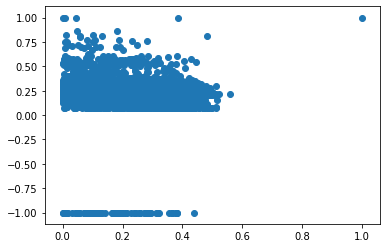

In [521]:
fig, axes = plt.subplots()
axes.scatter(long_form['exp'][0:5600], new_items[0:5600])
plt.show()

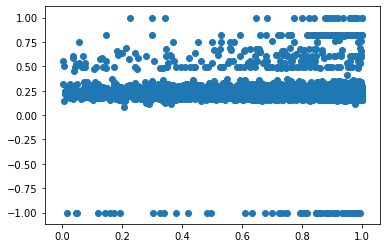

In [522]:
fig, axes = plt.subplots()
axes.scatter(long_form['exp'][5600:10000], new_items[5600:10000])
plt.show()

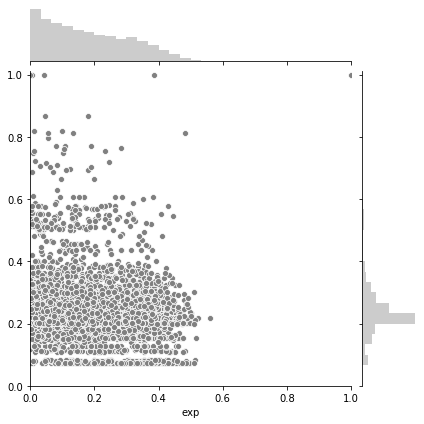

In [555]:
import matplotlib.pyplot as plt
g = sns.JointGrid(x=long_form['exp'][0:5600], y=new_items[0:5600], xlim=(0.0,1.0), ylim=(0.0,1.01))
g = g.plot_joint(sns.scatterplot, color=".5")
g = g.plot_marginals(sns.distplot, kde=False, color=".5", norm_hist=False, bins=30,  hist_kws={'range':(0.0,1)})

In [ ]:
import matplotlib.pyplot as plt
g = sns.JointGrid(x=long_form['exp'][5600:10000], y=new_items[5600:10000], xlim=(0.0,1), ylim=(0.0,1))
g = g.plot_joint(sns.scatterplot, color=".5")
g = g.plot_marginals(sns.distplot, kde=False, color=".5", norm_hist=True, bins=10)

In [506]:
long_form['col_1'][5700:10000]

5700    Q9BSC4
5701    Q9BSC4
5702    Q9BSC4
5703    Q9BSC4
5704    Q9BSC4
         ...  
9995    Q9BSC4
9996    Q9BSC4
9997    Q9BSC4
9998    Q9BSC4
9999    Q9BSC4
Name: col_1, Length: 4300, dtype: object

In [ ]:
sns.distplot(df_domain_pair_tm_score['tmscore'], hist=True, kde=False)
exp.min().min()

7.731110432920923e-09

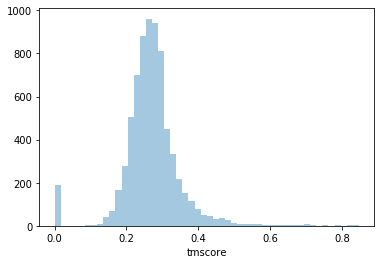

In [402]:
sns.distplot(df_domain_pair_tm_score['tmscore'], hist=True, kde=False)
exp.min().min()

7.731110432920923e-09

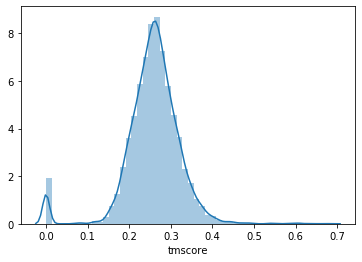

In [543]:
df_domain_pair_tm_score_same = df_domain_pair_tm_score.loc[df_domain_pair_tm_score['id1_cat']!= df_domain_pair_tm_score['id2_cat']]
sns.distplot(df_domain_pair_tm_score_same['tmscore'], hist=True)
exp.min().min()

7.731110432920923e-09

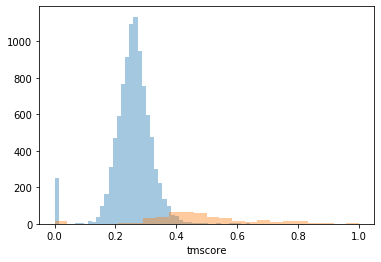

In [545]:
df_domain_pair_tm_score_same_2 = df_domain_pair_tm_score.loc[df_domain_pair_tm_score['id1_cat']== df_domain_pair_tm_score['id2_cat']]
sns.distplot(df_domain_pair_tm_score_same['tmscore'], hist=True, kde=False)
sns.distplot(df_domain_pair_tm_score_same_2['tmscore'], hist=True, kde=False)
exp.min().min()

In [108]:
del merged_left['resource']
del merged_left['id']
#del merged_left['pdb_chain_domain']
merged_left['freq'] = 1

/home/lohia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [140]:
merged_right = merged_left.head(10000000)
new=merged_right['cath'].str.split(".", n = 3, expand = True)  # expand the cath domains
merged_right['cat'] = new[0] + '.' + new[1] + '.' + new[2]
table = pd.pivot_table(merged_right, index=['cat'],
                    columns=['accession'], values= 'freq')
structure_cat = table.T
structure_cat = structure_cat.fillna(0)

/home/lohia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
exp = pd.read_hdf('/data/lohia/EGAD_analysis/3d_pred/filtered_exp.hdf5', 'nw') #this was the file written from api

In [110]:
subset_cols = list (set(exp.index) & set(structure_cat.index))

In [141]:
structure_cat = structure_cat.loc[subset_cols, :]


In [123]:
exp = exp.loc[subset_cols, subset_cols]

Q5VWK5    Q9BSC4    Q9Y689    Q8IXF0    P09211    O14910    P31947  \
Q5VWK5  0.999932  0.410018  0.270652  0.075185  0.019253  0.016122  0.034865   
Q9BSC4  0.410018  0.999932  0.992430  0.405605  0.905705  0.613063  0.375851   
Q9Y689  0.270652  0.992430  0.999932  0.444552  0.763322  0.745965  0.048004   
Q8IXF0  0.075185  0.405605  0.444552  0.999932  0.117304  0.326869  0.061252   
P09211  0.019253  0.905705  0.763322  0.117304  0.999932  0.298401  0.509395   
...          ...       ...       ...       ...       ...       ...       ...   
Q9NS91  0.480439  0.992266  0.978359  0.365541  0.769220  0.683864  0.209658   
Q96HS1  0.276858  0.972160  0.907066  0.252168  0.896530  0.435888  0.377748   
Q8N196  0.017646  0.522656  0.385067  0.347138  0.626149  0.033357  0.311933   
Q9UHQ9  0.035921  0.912983  0.868590  0.345626  0.970428  0.575089  0.361494   
Q8WUA8  0.021723  0.651461  0.493886  0.241708  0.668217  0.115397  0.372151   

          P05549    Q9Y5F8    Q99807  ...    O75152    Q96GX1    O00219  \
Q5VWK5  0.040980  0.039302  0.319510  ...  0.203590  0.298859  0.188735   
Q9BSC4  0.522451  0.698553  0.976083  ...  0.588818  0.870823  0.808732   
Q9Y689  0.399162  0.670580  0.980083  ...  0.591567  0.831993  0.631225   
Q8IXF0  0.371203  0.593906  0.537794  ...  0.157015  0.598999  0.231014   
P09211  0.340875  0.302252  0.821504  ...  0.048069  0.674401  0.573703   
...          ...       ...       ...  ...       ...       ...       ...   
Q9NS91  0.409982  0.580060  0.968499  ...  0.581695  0.940329  0.755142   
Q96HS1  0.391317  0.513875  0.937216  ...  0.340351  0.843640  0.772696   
Q8N196  0.470214  0.605438  0.475909  ...  0.050600  0.578953  0.315881   
Q9UHQ9  0.475102  0.611763  0.930741  ...  0.150018  0.850118  0.684953   
Q8WUA8  0.398116  0.473397  0.569338  ...  0.046535  0.497226  0.368873   

          Q8N3Z0    Q8NFZ8    Q9NS91    Q96HS1    Q8N196    Q9UHQ9    Q8WUA8  
Q5VWK5  0.167338  0.002667  0.480439  0.276858  0.017646  0.035921  0.021723  
Q9BSC4  0.448606  0.564752  0.992266  0.972160  0.522656  0.912983  0.651461  
Q9Y689  0.517041  0.506108  0.978359  0.907066  0.385067  0.868590  0.493886  
Q8IXF0  0.349030  0.402645  0.365541  0.252168  0.347138  0.345626  0.241708  
P09211  0.336184  0.686957  0.769220  0.896530  0.626149  0.970428  0.668217  
...          ...       ...       ...       ...       ...       ...       ...  
Q9NS91  0.482732  0.487692  0.999932  0.972026  0.325098  0.824227  0.513831  
Q96HS1  0.340981  0.718430  0.972026  0.999932  0.560449  0.918410  0.608315  
Q8N196  0.367868  0.533247  0.325098  0.560449  0.999932  0.575460  0.668434  
Q9UHQ9  0.377635  0.819250  0.824227  0.918410  0.575460  0.999932  0.644663  
Q8WUA8  0.336896  0.375920  0.513831  0.608315  0.668434  0.644663  0.999932  

[5675 rows x 5675 columns]

In [179]:
long_form = exp.unstack()

In [181]:
long_form.index.rename(['col_1', 'col_2'], inplace=True)
long_form = long_form.to_frame('exp').reset_index()

In [182]:
long_form

col_1   col_2       exp
0         Q5VWK5  Q5VWK5  0.999932
1         Q5VWK5  Q9BSC4  0.410018
2         Q5VWK5  Q9Y689  0.270652
3         Q5VWK5  Q8IXF0  0.075185
4         Q5VWK5  P09211  0.019253
...          ...     ...       ...
32205620  Q8WUA8  Q9NS91  0.513831
32205621  Q8WUA8  Q96HS1  0.608315
32205622  Q8WUA8  Q8N196  0.668434
32205623  Q8WUA8  Q9UHQ9  0.644663
32205624  Q8WUA8  Q8WUA8  0.999932

[32205625 rows x 3 columns]

In [289]:
uni_list = merged_left['accession'].tolist()
tm_score_list = []
#for uni_1, uni_2 in zip(long_form['col_1'][0:10], long_form['col_2'][0:10]):
#    m_val =  subprocess.check_output("/data/lohia/TMalign %s.pdb %s.pdb -a | grep 'TM-score=' | awk 'FNR == 3 {print $2}'" %(uni_pdb[uni_1], uni_pdb[uni_2]), shell=True)
#    #m_val =  subprocess.call("/data/lohia/TMalign %s.pdb %s.pdb -a" %(uni_pdb[uni_1], uni_pdb[uni_2]), shell=True)
#    print (m_val)
#    
pre_tm_score = [subprocess.check_output("/data/lohia/TMalign pdb_files/%s.pdb pdb_files/%s.pdb -a | grep 'TM-score=' | awk 'FNR == 3 {print $2}'" %(uni_pdb[uni_1], uni_pdb[uni_2]), shell=True).strip().decode('ascii') for uni_1, uni_2 in zip(long_form['col_1'][0:500], long_form['col_2'][0:500])]


In [290]:
uni_list = merged_left['accession'].tolist()
tm_score_list = []
#for uni_1, uni_2 in zip(long_form['col_1'][0:10], long_form['col_2'][0:10]):
#    m_val =  subprocess.check_output("/data/lohia/TMalign %s.pdb %s.pdb -a | grep 'TM-score=' | awk 'FNR == 3 {print $2}'" %(uni_pdb[uni_1], uni_pdb[uni_2]), shell=True)
#    #m_val =  subprocess.call("/data/lohia/TMalign %s.pdb %s.pdb -a" %(uni_pdb[uni_1], uni_pdb[uni_2]), shell=True)
#    print (m_val)
#    
pre_tm_score_domain = [subprocess.check_output("/data/lohia/TMalign /data/lohia/EGAD_analysis/pdb_files/pdb_files/%s.pdb /data/lohia/EGAD_analysis/pdb_files/pdb_files/%s.pdb -a | grep 'TM-score=' | awk 'FNR == 3 {print $2}'" %(uni_pdbdomain[uni_1], uni_pdbdomain[uni_2]), shell=True).strip().decode('ascii') for uni_1, uni_2 in zip(long_form['col_1'][0:500], long_form['col_2'][0:500])]


In [ ]:
pre_tm_score_domain = [subprocess.check_output("/data/lohia/TMalign /data/lohia/EGAD_analysis/pdb_files/pdb_files/%s.pdb /data/lohia/EGAD_analysis/pdb_files/pdb_files/%s.pdb -a | grep 'TM-score=' | awk 'FNR == 3 {print $2}'" %(uni_pdbdomain[uni_1], uni_pdbdomain[uni_2]), shell=True).strip().decode('ascii') for uni_1, uni_2 in zip(long_form['col_1'][0:500], long_form['col_2'][0:500])]

In [291]:
uni_list = merged_left['accession'].tolist()
tm_score_list = []
#for uni_1, uni_2 in zip(long_form['col_1'][0:10], long_form['col_2'][0:10]):
#    m_val =  subprocess.check_output("/data/lohia/TMalign %s.pdb %s.pdb -a | grep 'TM-score=' | awk 'FNR == 3 {print $2}'" %(uni_pdb[uni_1], uni_pdb[uni_2]), shell=True)
#    #m_val =  subprocess.call("/data/lohia/TMalign %s.pdb %s.pdb -a" %(uni_pdb[uni_1], uni_pdb[uni_2]), shell=True)
#    print (m_val)
#    
pre_tm_score_chain = [subprocess.check_output("/data/lohia/TMalign /data/lohia/EGAD_analysis/pdb_files/pdb_files/%s.pdb /data/lohia/EGAD_analysis/pdb_files/pdb_files/%s.pdb -a | grep 'TM-score=' | awk 'FNR == 3 {print $2}'" %(uni_pdb_chain[uni_1], uni_pdb_chain[uni_2]), shell=True).strip().decode('ascii') for uni_1, uni_2 in zip(long_form['col_1'][0:500], long_form['col_2'][0:500])]


In [350]:
! /data/lohia/TMalign /data/lohia/EGAD_analysis/pdb_files/pdb_files/3ctuA00.pdb /data/lohia/EGAD_analysis/pdb_files/pdb_files/1n26_A.pdb -a

At line 293 of file TMalign.f (unit = 10, file = '')
Fortran runtime error: File '/data/lohia/EGAD_analysis/pdb_files/pdb_files/3ctuA00.pdb' does not exist


In [349]:
uni_list[0:7]
uni_pdbdomain['Q6P4Q7']

'3ctuA00'

In [344]:
long_form['col_2'][136:138]

136    Q6P4Q7
137    Q9UIU6
Name: col_2, dtype: object

In [356]:
import re
print (pre_tm_score)
tm_score = [float(i) for i in pre_tm_score]

['1.00000', '0.20768', '0.22551', '0.27331', '0.20678', '0.20505', '0.24074', '0.18422', '0.18441', '0.21967', '0.22332', '0.18422', '0.17449', '0.23331', '0.18422', '0.21861', '0.19168', '0.18441', '0.23104', '0.18280', '0.20646', '0.21574', '0.38082', '0.21488', '0.19698', '0.18422', '0.49691', '0.21571', '0.24937', '0.19373', '0.21860', '0.24468', '0.18280', '0.25396', '0.20934', '0.18422', '0.18696', '0.25813', '0.20768', '0.31687', '0.24707', '0.18996', '0.21157', '0.20768', '0.24058', '0.19542', '0.26314', '0.19657', '0.20534', '0.25737', '0.18126', '0.19168', '0.22607', '0.22695', '0.21124', '0.20257', '0.19280', '0.18422', '0.23174', '0.25185', '0.22207', '0.26544', '0.22018', '0.18422', '0.24937', '0.19698', '0.18979', '0.19464', '0.21480', '0.18500', '0.21694', '0.19817', '0.18422', '0.18422', '0.24865', '0.23051', '0.15494', '0.19143', '0.00667', '0.18422', '0.25397', '0.18422', '0.27461', '0.19450', '0.19698', '0.40350', '0.23174', '0.23146', '0.22623', '0.19995', '0.21849'

In [354]:
import re
print (pre_tm_score_domain[136:137])
new_items = ['0.0' if x=='' else x for x in pre_tm_score_domain]
print (new_items[136:137])

tm_score_domain = [float(i) for i in new_items]

['']
['0.0']


In [360]:
import re
print (pre_tm_score_chain[136:137])
new_items = ['0.0' if x=='' else x for x in pre_tm_score_chain]
tm_score_chain = [float(i) for i in new_items]

['0.20952']


In [228]:
tm_score

[1.0, 0.20768, 0.22551, 0.27331, 0.20678]

In [115]:
structure_cat = structure_cat.loc[subset_cols., :]

In [142]:
structure_cat

cat        1.10.10  1.10.1000  1.10.1060  1.10.1070  1.10.1090  1.10.1170  \
accession                                                                   
Q5VWK5         0.0        0.0        0.0        0.0        0.0        0.0   
Q9BSC4         0.0        0.0        0.0        0.0        0.0        0.0   
Q9Y689         0.0        0.0        0.0        0.0        0.0        0.0   
Q8IXF0         0.0        0.0        0.0        0.0        0.0        0.0   
P09211         0.0        0.0        0.0        0.0        0.0        0.0   
...            ...        ...        ...        ...        ...        ...   
Q9NS91         0.0        0.0        0.0        0.0        0.0        0.0   
Q96HS1         0.0        0.0        0.0        0.0        0.0        0.0   
Q8N196         0.0        0.0        0.0        0.0        0.0        0.0   
Q9UHQ9         0.0        0.0        0.0        0.0        0.0        0.0   
Q8WUA8         0.0        0.0        0.0        0.0        0.0        0.0   

cat        1.10.1200  1.10.1280  1.10.1300  1.10.132  ...  3.90.920  3.90.930  \
accession                                             ...                       
Q5VWK5           0.0        0.0        0.0       0.0  ...       0.0       0.0   
Q9BSC4           0.0        0.0        0.0       0.0  ...       0.0       0.0   
Q9Y689           0.0        0.0        0.0       0.0  ...       0.0       0.0   
Q8IXF0           0.0        0.0        0.0       0.0  ...       0.0       0.0   
P09211           0.0        0.0        0.0       0.0  ...       0.0       0.0   
...              ...        ...        ...       ...  ...       ...       ...   
Q9NS91           0.0        0.0        0.0       0.0  ...       0.0       0.0   
Q96HS1           0.0        0.0        0.0       0.0  ...       0.0       0.0   
Q8N196           0.0        0.0        0.0       0.0  ...       0.0       0.0   
Q9UHQ9           0.0        0.0        0.0       0.0  ...       0.0       0.0   
Q8WUA8           0.0        0.0        0.0       0.0  ...       0.0       0.0   

cat        4.10.10  4.10.1070  4.10.1080  4.10.1090  4.10.1110  4.10.280  \
accession                                                                  
Q5VWK5         0.0        0.0        0.0        0.0        0.0       0.0   
Q9BSC4         0.0        0.0        0.0        0.0        0.0       0.0   
Q9Y689         0.0        0.0        0.0        0.0        0.0       0.0   
Q8IXF0         0.0        0.0        0.0        0.0        0.0       0.0   
P09211         0.0        0.0        0.0        0.0        0.0       0.0   
...            ...        ...        ...        ...        ...       ...   
Q9NS91         0.0        0.0        0.0        0.0        0.0       0.0   
Q96HS1         0.0        0.0        0.0        0.0        0.0       0.0   
Q8N196         0.0        0.0        0.0        0.0        0.0       0.0   
Q9UHQ9         0.0        0.0        0.0        0.0        0.0       0.0   
Q8WUA8         0.0        0.0        0.0        0.0        0.0       0.0   

cat        4.10.410  4.10.990  
accession                      
Q5VWK5          0.0       0.0  
Q9BSC4          0.0       0.0  
Q9Y689          0.0       0.0  
Q8IXF0          0.0       0.0  
P09211          0.0       0.0  
...             ...       ...  
Q9NS91          0.0       0.0  
Q96HS1          0.0       0.0  
Q8N196          0.0       0.0  
Q9UHQ9          0.0       0.0  
Q8WUA8          0.0       0.0  

[5675 rows x 360 columns]

In [143]:
from scipy.spatial.distance import pdist, squareform
structure_cat_sim = 1 - pdist(structure_cat , 'jaccard') #calculates the condensed matrix/ co-ordinate mat

In [113]:
exp_unpivoted = pd.melt(exp, value_vars=exp.columns, ignore_index=False, var_name='accession', value_name='coexp') #this get the pairwise matrix but not in condensed form)
exp_unpivoted

accession     coexp
Q5VWK5    Q5VWK5  0.999932
Q9BSC4    Q5VWK5  0.410018
Q9Y689    Q5VWK5  0.270652
Q8IXF0    Q5VWK5  0.075185
P09211    Q5VWK5  0.019253
...          ...       ...
Q9NS91    Q8WUA8  0.513831
Q96HS1    Q8WUA8  0.608315
Q8N196    Q8WUA8  0.668434
Q9UHQ9    Q8WUA8  0.644663
Q8WUA8    Q8WUA8  0.999932

[32205625 rows x 2 columns]

In [127]:
dist_a = squareform(exp, checks=False)

In [132]:
import itertools
index_list = list(itertools.combinations(subset_cols,2))
col_1 = [i[0] for i in index_list]
col_2 = [i[1] for i in index_list]

In [133]:
df = pd.DataFrame(list(zip(col_1, col_2)), columns =['col_1', 'col_2']) 

In [135]:
df['exp'] = dist_a

In [144]:
df['structure_sim'] = structure_cat_sim

In [145]:
df

col_1   col_2       exp  structure_sim
0         Q5VWK5  Q9BSC4  0.410018            0.0
1         Q5VWK5  Q9Y689  0.270652            0.0
2         Q5VWK5  Q8IXF0  0.075185            0.0
3         Q5VWK5  P09211  0.019253            0.0
4         Q5VWK5  O14910  0.016122            0.0
...          ...     ...       ...            ...
16099970  Q96HS1  Q9UHQ9  0.918410            1.0
16099971  Q96HS1  Q8WUA8  0.608315            0.0
16099972  Q8N196  Q9UHQ9  0.575460            0.0
16099973  Q8N196  Q8WUA8  0.668434            0.0
16099974  Q9UHQ9  Q8WUA8  0.644663            0.0

[16099975 rows x 4 columns]

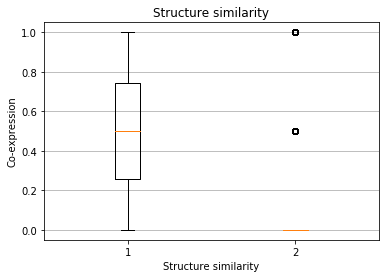

In [146]:
fig, axes = plt.subplots()
axes.boxplot([df["exp"].values, df["structure_sim"].values] )
axes.set_title('Structure similarity')
axes.yaxis.grid(True)
axes.set_xlabel('Structure similarity')
axes.set_ylabel('Co-expression')

plt.show()

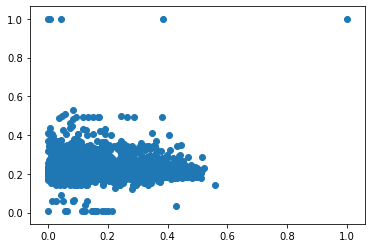

In [231]:
fig, axes = plt.subplots()
axes.scatter(long_form['exp'][0:500], tm_score)
plt.show()

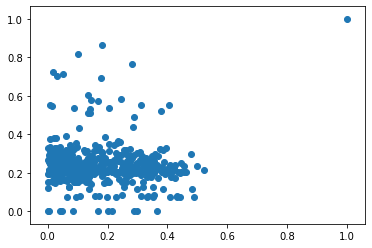

In [358]:
fig, axes = plt.subplots()
axes.scatter(long_form['exp'][0:500], tm_score_domain)
plt.show()

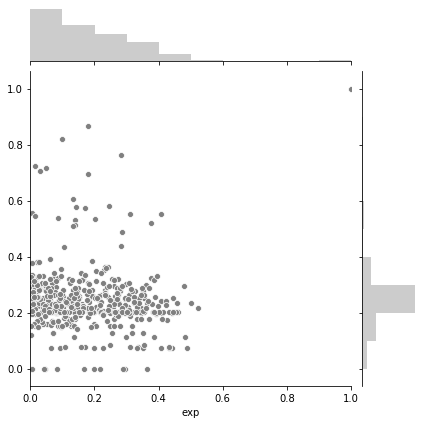

In [370]:
import matplotlib.pyplot as plt
g = sns.JointGrid(x=long_form['exp'][0:500], y=tm_score_domain, xlim=(0.0,1))
g = g.plot_joint(sns.scatterplot, color=".5")
g = g.plot_marginals(sns.distplot, kde=False, color=".5", norm_hist=True, bins=10)

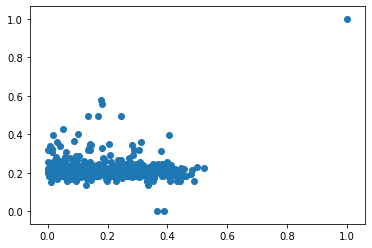

In [361]:
fig, axes = plt.subplots()
axes.scatter(long_form['exp'][0:500], tm_score_chain)
plt.show()

NameError: name 'tm_score_domain' is not defined

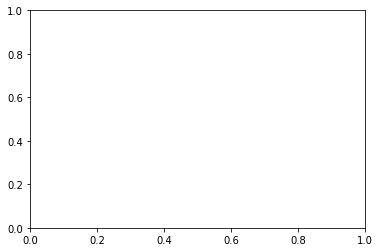

In [295]:
fig, axes = plt.subplots()
axes.scatter(long_form['exp'][0:500], tm_score_domain)
plt.show()

In [45]:
! wget https://files.rcsb.org/download/5FLX.pdb
! wget https://files.rcsb.org/download/4M55.pdb
 

--2020-08-24 00:24:51--  https://files.rcsb.org/download/5FLX.pdb
Resolving files.rcsb.org (files.rcsb.org)... 128.6.244.95
Connecting to files.rcsb.org (files.rcsb.org)|128.6.244.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘5FLX.pdb.1’

    [ <=>                                   ] 6,819,552   --.-K/s   in 0.1s    

2020-08-24 00:24:52 (48.5 MB/s) - ‘5FLX.pdb.1’ saved [6819552]

--2020-08-24 00:24:52--  https://files.rcsb.org/download/4M55.pdb
Resolving files.rcsb.org (files.rcsb.org)... 128.6.244.95
Connecting to files.rcsb.org (files.rcsb.org)|128.6.244.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘4M55.pdb’

    [ <=>                                   ] 1,990,494   --.-K/s   in 0.07s   

2020-08-24 00:24:52 (26.8 MB/s) - ‘4M55.pdb’ saved [1990494]



In [47]:
! /data/lohia/TMalign


 Brief instruction for running TM-align program:
 (For detail: Zhang & Skolnick, Nucl. Acid. Res. 33: 2302-9, 2005)

 1. Align 'chain_1.pdb' and 'chain_2.pdb':
    >TMalign chain_1.pdb chain_2.pdb

 2. Ask TM-align to start with an alignment specified in fasta file 'align.txt':
    >TMalign chain_1.pdb chain_2.pdb -i align.txt
    or to stick the alignment to 'align.txt':
    >TMalign chain_1.pdb chain_2.pdb -I align.txt

 3. Output the superposition to 'TM.sup', 'TM.sup_all' and 'TM.sup_atm':
    >TMalign chain_1.pdb chain_2.pdb -o TM.sup
       To view superimposed C-alpha traces of aligned regions by rasmol or pymol:
         >rasmol -script TM.sup
         >pymol -d @TM.sup.pml
       To view superimposed C-alpha traces of all regions:
         >rasmol -script TM.sup_all
         >pymol -d @TM.sup_all.pml
       To view superimposed full-atom structures of aligned regions:
         >rasmol -script TM.sup_atm
         >pymol -d @TM.sup_atm.pml
       To view superimposed full-atom 

In [164]:
! /data/lohia/TMalign 5FLX.pdb 4M55.pdb -a | grep 'TM-score=' | awk '{print $2}' awk '{print NR-1 "," $0}'

awk: fatal: cannot open file `awk' for reading (No such file or directory)
grep: write error: Broken pipe


In [246]:
subprocess.check_output("/data/lohia/TMalign 5FLX.pdb 4M55.pdb -a" , shell=True)

CalledProcessError: Command '/data/lohia/TMalign 5FLX.pdb 4M55.pdb -a' returned non-zero exit status 2.

In [248]:
!/data/lohia/TMalign pdb_files/5FLX.pdb pdb_files/4M55.pdb -a


 **************************************************************************
 *                        TM-align (Version 20190822)                     *
 * An algorithm for protein structure alignment and comparison            *
 * Based on statistics:                                                   *
 *       0.0 < TM-score < 0.30, random structural similarity              *
 *       0.5 < TM-score < 1.00, in about the same fold                    *
 * Reference: Y Zhang and J Skolnick, Nucl Acids Res 33, 2302-9 (2005)    *
 * Please email your comments and suggestions to: zhng@umich.edu          *
 **************************************************************************

Name of Chain_1: pdb_files/5FLX.pdb                                
Name of Chain_2: pdb_files/4M55.pdb                                
Length of Chain_1:  215 residues
Length of Chain_2:  263 residues

Aligned length=  125, RMSD=   5.37, Seq_ID=n_identical/n_aligned= 0.112
TM-score= 0.36666 (if normalized by len